<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#New-approach" data-toc-modified-id="New-approach-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>New approach</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Присвоение-X-и-y-статуса-атрибутов-и-тегов" data-toc-modified-id="Присвоение-X-и-y-статуса-атрибутов-и-тегов-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Присвоение X и y статуса атрибутов и тегов</a></span></li><li><span><a href="#Расщепление-тестовых-и-тренировочных-наборов" data-toc-modified-id="Расщепление-тестовых-и-тренировочных-наборов-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Расщепление тестовых и тренировочных наборов</a></span></li><li><span><a href="#Инициализация-нейронной-сети" data-toc-modified-id="Инициализация-нейронной-сети-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Инициализация нейронной сети</a></span></li><li><span><a href="#Определение-путем-добавления-слоев" data-toc-modified-id="Определение-путем-добавления-слоев-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Определение путем добавления слоев</a></span></li><li><span><a href="#Компиляция-нейронной-сети" data-toc-modified-id="Компиляция-нейронной-сети-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Компиляция нейронной сети</a></span></li><li><span><a href="#Тренируйте-нейронную-сеть" data-toc-modified-id="Тренируйте-нейронную-сеть-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Тренируйте нейронную сеть</a></span></li></ul></li></ul></li></ul></div>

Dataset of kaggle - https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


In [4]:
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical

In [5]:
df = pd.read_csv('datasets/weatherAUS.csv')

In [6]:
import sys
sys.setrecursionlimit(1500)

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?

In [7]:
print(df.isna().sum())
print(df.shape[0],'-->', df.dropna().shape[0])


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64
145460 --> 56420


In [20]:
df.dropna(inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [21]:
df["Date"] = pd.to_datetime(df.Date)

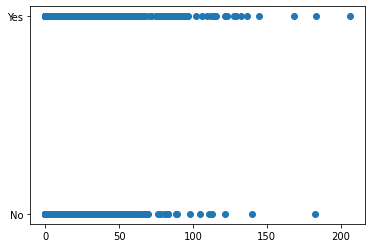

In [22]:
# rainfall_case = df["Rainfall"].astype(int)
plt.scatter(df["Rainfall"], df["RainTomorrow"])

Мы видим что даже когда в какой-то день был ливень, станция считала что на этот день дождя не было.

In [23]:
print('Data for RainToday = NO: \n', 
      df.loc[(df['Rainfall'] > 0)&(df['RainToday'] == 'No')]['Rainfall'].value_counts(),'\n')

print('Data for RainToday = YES: \n',
     df.loc[(df['Rainfall'] <= 1) & (df['Rainfall'] >= 0.1) &
    (df['RainToday'] == 'Yes')]['Rainfall'].value_counts(),'\n')

Data for RainToday = NO: 
 0.2    3009
0.4    1593
0.6    1087
0.8     834
1.0     695
0.1      13
0.3      11
0.7       3
0.9       3
0.5       1
Name: Rainfall, dtype: int64 

Data for RainToday = YES: 
 Series([], Name: Rainfall, dtype: int64) 



Значения от 0.1 до 1.0 единиц ливня не фиксировались станцией как дождь
###### 0.04 - 0.48 процента ливня станция не считает за факт дождя

In [24]:
print('Data for RainTomorrow = YES: \n',
     df.loc[(df['Rainfall'] <= 1) & (df['Rainfall'] >= 0.1) &
    (df['RainTomorrow'] == 'Yes')]['Rainfall'].value_counts(),'\n')

print('Data for RainTomorrow = NO: \n',
     df.loc[(df['Rainfall'] <= 1) & (df['Rainfall'] >= 0.1) &
    (df['RainTomorrow'] == 'No')]['Rainfall'].value_counts(),'\n')

Data for RainTomorrow = YES: 
 0.2    674
0.4    451
0.6    315
0.8    278
1.0    217
0.1      3
0.3      2
Name: Rainfall, dtype: int64 

Data for RainTomorrow = NO: 
 0.2    2335
0.4    1142
0.6     772
0.8     556
1.0     478
0.1      10
0.3       9
0.7       3
0.9       3
0.5       1
Name: Rainfall, dtype: int64 



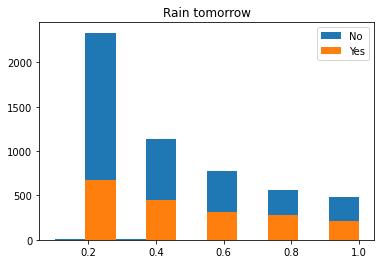

In [25]:
X1 = df.loc[(df['Rainfall'] <= 1) & (df['Rainfall'] >= 0.1) &
    (df['RainTomorrow'] == 'No')]['Rainfall']

X2 = df.loc[(df['Rainfall'] <= 1) & (df['Rainfall'] >= 0.1) &
    (df['RainTomorrow'] == 'Yes')]['Rainfall']


fig, ax = plt.subplots()

ax.hist(X1)
ax.hist(X2)
plt.legend(['No','Yes'])
plt.title('Rain tomorrow')

plt.show()

Я могу предположить что неоднозначность этих маленьких данных связанна с тем, что данные для положительного RT являются просто вероятностью, не имея почти никакой зависимости по отношению к RT. Данные проводились на протяжении 10 лет, и столь большой промежуток времени может в себя включать вероятность того, что станция фиксировала данные во время начала ливня. Это заметно по распределению положительного RT по отношению друг к другу, в то время как распредление отрицательного RT походит на логнормальное

In [26]:
humidity = df['Humidity9am']
rainfall = df['Rainfall']

In [27]:
from sklearn.linear_model import LinearRegression
humidity = np.array(humidity).reshape(-1,1)
rainfall = np.array(rainfall).reshape(-1,1)

LineReg = LinearRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    rainfall,
    humidity,
    test_size=0.2)

In [29]:
LineReg.fit(X_train,y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predicted_y = LineReg.predict(X_test)

print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

319.1704335382963
13.97415086162155


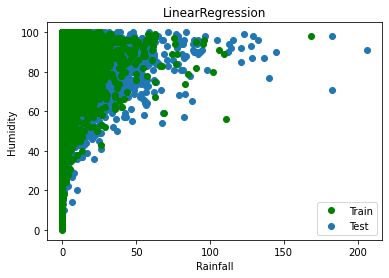

In [31]:
fig, ax = plt.subplots()
plt.xlabel('Rainfall')
plt.ylabel('Humidity')

ax.scatter(X_train, y_train)
ax.plot(X_test, y_test, 'go')

ax.set_title('LinearRegression')
ax.legend(['Train','Test'])
plt.show()

In [32]:
test_df = df.drop(['Date','Location'],axis=1)
print(test_df.isna().sum())
test_df.head()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [33]:
# filling missing values with mode of the columns in values
s = (test_df.dtypes == 'object')
category_cols = list(s[s].index)

for obj in category_cols:
    test_df[obj].fillna(test_df[obj].mode, inplace=True)


# filling missing values with median of the colunms in values
n = (test_df.dtypes == 'float64')
numeric_cols = list(n[n].index) 

for flt in numeric_cols:
    test_df[flt].fillna(test_df[flt].median(), inplace=True)
    
test_df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [34]:
def replace_binom(row):
    if row == 'No':
        return 0
    else:
        return 1
    
test_df.RainToday = test_df.RainToday.apply(replace_binom)
test_df.RainTomorrow = test_df.RainTomorrow.apply(replace_binom)
test_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [35]:
ordinal = test_df.iloc[:,[5,7,8]]
# label = df.dropna().iloc[:,1]
ordinal.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [36]:
import category_encoders as ce
ce_ord = ce.OrdinalEncoder(cols=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
ordinal = ce_ord.fit_transform(ordinal)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
# ce_one = ce.OneHotEncoder()
# label = ce_one.fit_transform(label)

In [38]:
test_df.iloc[:,[5,7,8]] = ordinal
test_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,1,48.0,1,1,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,2,37.0,2,2,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,3,46.0,3,3,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,4,31.0,4,4,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,4,35.0,5,5,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,7,35.0,8,14,9.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,21.2,32.6,0.0,7.6,8.6,9,37.0,8,9,13.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,20.7,32.8,0.0,5.6,11.0,9,33.0,12,16,17.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,19.5,31.8,0.0,6.2,10.6,14,26.0,8,3,9.0,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [39]:
y = test_df['RainTomorrow']
X = test_df.drop('RainTomorrow', axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier()
params = {'max_features':''}

# обучаем модель
model.fit(X_train,y_train_22)

NameError: name 'X_train_22' is not defined

In [97]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((101822, 20), (101822,), (43638, 20), (43638,))

In [98]:
%%time
y_rf_pred = model.predict(X_test)
print(accuracy_score(y_rf_pred, y_test))
print(classification_report(y_test, y_rf_pred))

0.9538017324350336
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     33050
           1       0.95      0.86      0.90     10588

    accuracy                           0.95     43638
   macro avg       0.95      0.92      0.93     43638
weighted avg       0.95      0.95      0.95     43638

CPU times: user 1.72 s, sys: 131 ms, total: 1.85 s
Wall time: 2.02 s


## KNN


In [91]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# knn_params = {'n_neighbors': range(1, 10, 1),
#               'weights': ['uniform', 'distance'],
#               'metric': [
#     'euclidean', 'manhattan',
#     'chebyshev', 'minkowski',
# ],
# }
# knn_grid = GridSearchCV(knn, knn_params)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
%%time
y_knn_pred = knn.predict(X_test)
print(accuracy_score(y_knn_pred, y_test))
print(classification_report(y_test, y_knn_pred))

0.8191713644071681
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     33050
           1       0.67      0.50      0.57     10588

    accuracy                           0.82     43638
   macro avg       0.76      0.71      0.73     43638
weighted avg       0.81      0.82      0.81     43638

CPU times: user 1min 24s, sys: 1.04 s, total: 1min 25s
Wall time: 1min 30s


## Naive Bayes

In [100]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

CPU times: user 75.4 ms, sys: 79 ms, total: 154 ms
Wall time: 257 ms


GaussianNB()

In [101]:
%%time
y_gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_gnb_pred, y_test))
print(classification_report(y_test, y_gnb_pred))

0.7893808148861085
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     33050
           1       0.56      0.59      0.58     10588

    accuracy                           0.79     43638
   macro avg       0.71      0.72      0.72     43638
weighted avg       0.79      0.79      0.79     43638

CPU times: user 109 ms, sys: 40.9 ms, total: 150 ms
Wall time: 212 ms


## SVM

In [108]:
%%time
from sklearn import svm
sup_vec_met = svm.SVC(random_state=46)
sup_vec_met.fit(X_train, y_train)

CPU times: user 6min 32s, sys: 2.96 s, total: 6min 35s
Wall time: 6min 47s


SVC(random_state=46)

In [109]:
y_svm_pred = sup_vec_met.predict(X_test)
print(accuracy_score(y_svm_pred, y_test))
print(classification_report(y_test, y_svm_pred))

0.8178422475823823
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     33050
           1       0.77      0.35      0.49     10588

    accuracy                           0.82     43638
   macro avg       0.80      0.66      0.69     43638
weighted avg       0.81      0.82      0.79     43638



## XGBoost

In [111]:
%%time
import xgboost
xgboost_classifier = xgboost.XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:55] WARNING: /private/var/folders/23/kp8g5yhx05qf9fjrh9p898240000gn/T/pip-install-bgwdvot2/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 38.6 s, sys: 779 ms, total: 39.4 s
Wall time: 18 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
y_xgb_pred = xgboost_classifier.predict(X_test)
print(accuracy_score(y_xgb_pred, y_test))
print(classification_report(y_test, y_xgb_pred))

0.8471057335349924
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     33050
           1       0.75      0.55      0.64     10588

    accuracy                           0.85     43638
   macro avg       0.81      0.75      0.77     43638
weighted avg       0.84      0.85      0.84     43638



No handles with labels found to put in legend.


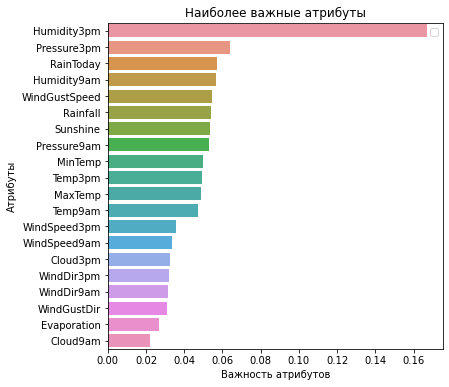

In [869]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [718]:
from sklearn.metrics import classification_report
model_pred_of_base_1000 = model.predict(X_test_22)

base_1000_report = classification_report(y_test_22, model_pred)

print(base_1000_report)

base_1000 = model.score(X_test_22, y_test_22)
base_1000

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     13098
           1       0.22      0.15      0.18      3828

    accuracy                           0.69     16926
   macro avg       0.50      0.50      0.49     16926
weighted avg       0.65      0.69      0.67     16926



0.8600968923549569

In [870]:
model_pred_fill = model.predict(X_test_22)

fill_100_report = classification_report(y_test_22, model_pred_fill)

print(fill_100_report)

fill_100 = model.score(X_test_22, y_test_22)
fill_100

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33084
           1       0.77      0.53      0.62     10554

    accuracy                           0.85     43638
   macro avg       0.81      0.74      0.76     43638
weighted avg       0.84      0.85      0.84     43638



0.8463953435079518

In [ ]:
model_pred_of_base_100 = model.predict(X_test_22)

base_100_report = classification_report(y_test_22, model_pred)

print(base_100_report)

base_100 = model.score(X_test_22, y_test_22)
base_100

# New approach

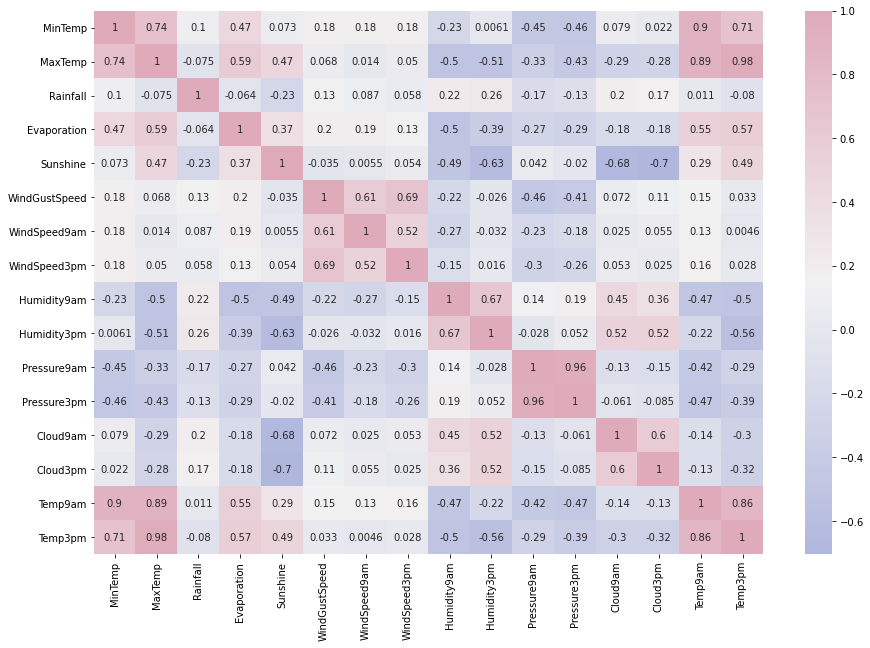

In [4]:
data = pd.read_csv('datasets/weatherAUS.csv')
corr = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)

ax, fig = plt.subplots(figsize=(15,10))
sns.heatmap(corr,cmap=cmap, annot=True, square=False)
plt.show()

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

# далее мы переводим данные о времени в циклическую непрерывную функцию
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data = encode(data, 'month', data.month.max())
data = encode(data, 'day', data.day.max())
print(f'{len(data.Location.unique())} --> {data.shape[0]}')

49 --> 145460


Text(0.5, 0, 'Days In Year')

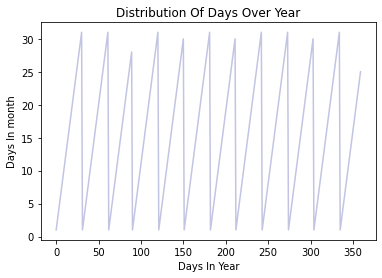

In [6]:
#выберем 360 первых строчек, как приблизетельное значение года
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

In [7]:
# Как и ожидалось, атрибут данных "год" повторяется. 
# Однако в этом случае истинная циклическая природа не представлена в непрерывном виде. 
# Разделение месяцев и дней на синус и косинус обеспечивает циклическую непрерывную функцию. 
# Это может быть использовано в качестве входных функций для ANN.

Text(0.5, 0, 'Sine Encoded Months')

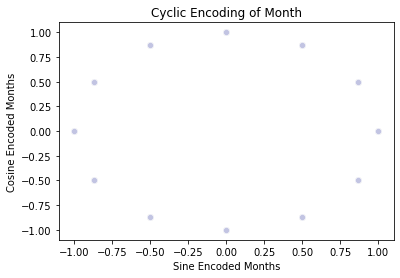

In [8]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Days')

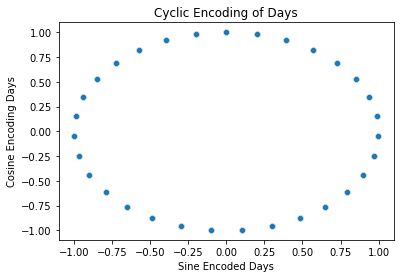

In [9]:
cyclic_days = sns.scatterplot(x="day_sin",y="day_cos",data=data)
cyclic_days.set_title("Cyclic Encoding of Days")
cyclic_days.set_ylabel("Cosine Encoding Days")
cyclic_days.set_xlabel("Sine Encoded Days")

Cleaning category data

In [10]:
s = (data.dtypes == 'object')
category_cols = list(s[s].index)
print('Category columns: \n', category_cols)

Category columns: 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [181]:
# missing values in category variables
for obj in category_cols:
    print(obj,'-',data[obj].isna().sum())

Location - 0
WindGustDir - 10326
WindDir9am - 10566
WindDir3pm - 4228
RainToday - 3261
RainTomorrow - 3267


In [182]:
# filling missing values with mode of the columns in value
for obj in category_cols:
    data[obj].fillna(data[obj].mode()[0], inplace=True)

Cleaning numeric data

In [183]:
n = (data.dtypes == 'float64')
numeric_cols = list(n[n].index) 
print('Numeric columns: \n', numeric_cols)

Numeric columns: 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [184]:
for flt in numeric_cols:
    print(flt,data[flt].isna().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [185]:
# filling missing values with median of the columns in values
for flt in numeric_cols:
    data[flt].fillna(data[flt].median(), inplace=True)
    
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
month_sin        0
month_cos        0
day_sin          0
day_cos          0
dtype: int64

Text(0.5, 0, 'Years')

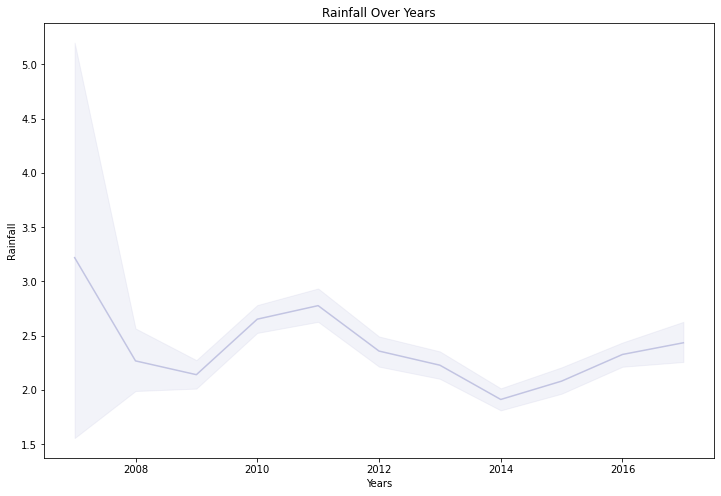

In [186]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

Text(0.5, 0, 'Year')

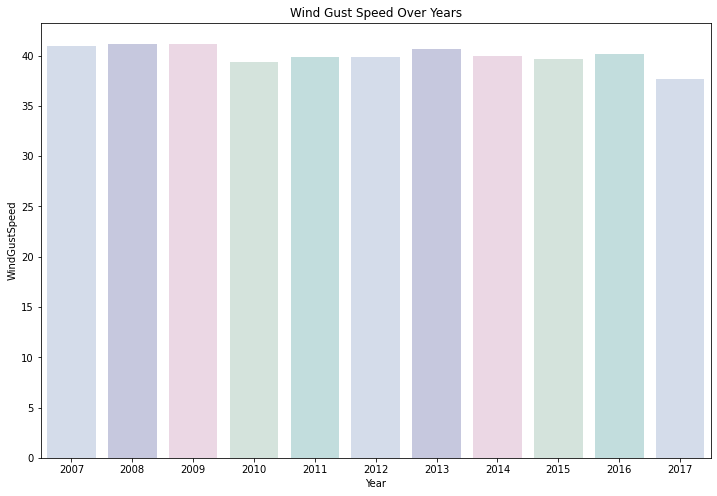

In [187]:
#Evauating Wind gust speed over years
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")

Label encoding the categorical varable

In [188]:
label_encoder = LabelEncoder()
for i in category_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [190]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 
features_shape = features.shape

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


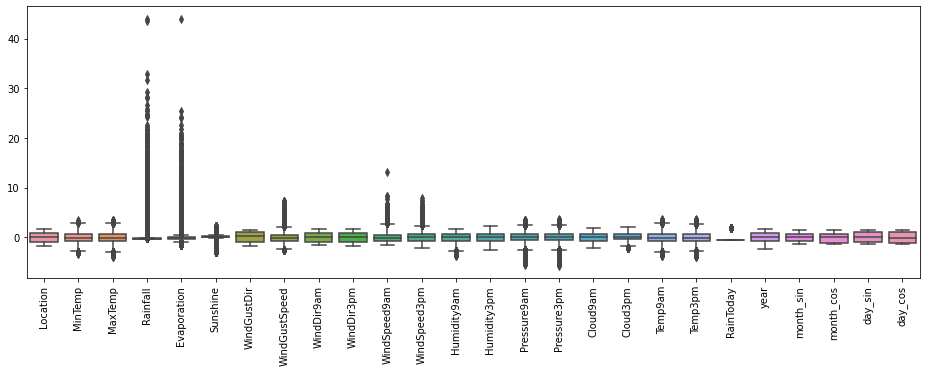

In [191]:
plt.figure(figsize=(16,5))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.show()

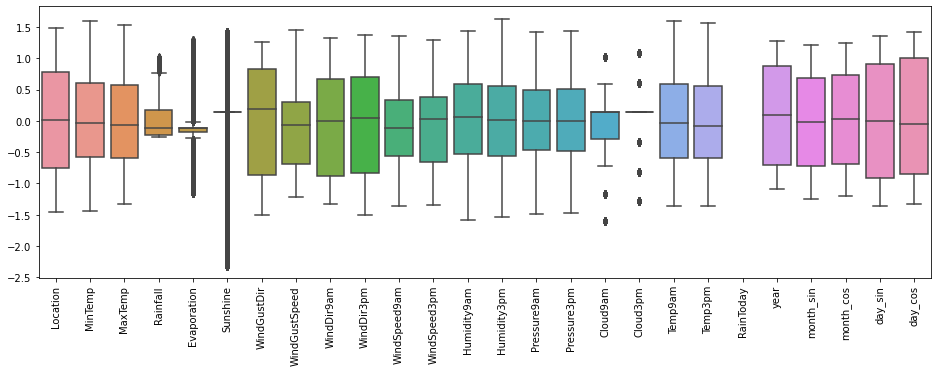

In [199]:
low = .05
high = .95
quant_data = features.quantile([low, high])
filt_features = features.apply(lambda x: x[(x>quant_data.loc[low,x.name]) & 
                                    (x < quant_data.loc[high,x.name])], axis=0)

plt.figure(figsize=(16,5))
sns.boxplot(data=filt_features)
plt.xticks(rotation=90)
plt.show()

features shape before: (145460, 26) 
features shape after: (127536, 27)


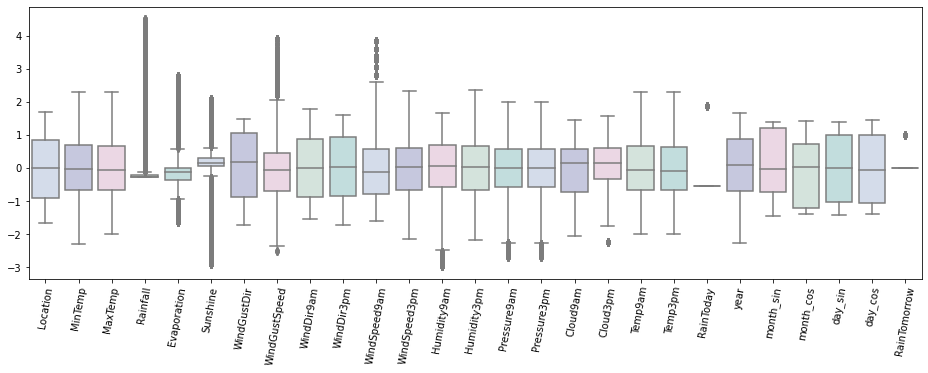

In [200]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

print('features shape before:',features_shape,'\nfeatures shape after:', features.shape)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]

plt.figure(figsize=(16,5))
sns.boxplot(data=features, palette=colours)
plt.xticks(rotation=80)
plt.show()

ПОСТРОЕНИЕ МОДЕЛИ
В этом проекте мы строим искусственную нейронную сеть.

В построении модели участвуют следующие шаги

### Присвоение X и y статуса атрибутов и тегов
### Расщепление тестовых и тренировочных наборов
### Инициализация нейронной сети
### Определение путем добавления слоев
### Компиляция нейронной сети
### Тренируйте нейронную сеть

In [201]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

In [202]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 7s 2ms/step - loss: 0.4221 - accuracy: 0.8110 - val_loss: 0.3702 - val_accuracy: 0.8412
Epoch 2/150
2551/2551 [==============================] - 4s 2ms/step - loss: 0.3683 - accuracy: 0.8441 - val_loss: 0.3621 - val_accuracy: 0.8439
Epoch 3/150
2551/2551 [==============================] - 6s 2ms/step - loss: 0.3596 - accuracy: 0.8462 - val_loss: 0.3596 - val_accuracy: 0.8428
Epoch 4/150
2551/2551 [==============================] - 4s 2ms/step - loss: 0.3531 - accuracy: 0.8500 - val_loss: 0.3587 - val_accuracy: 0.8435
Epoch 5/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3559 - accuracy: 0.8469 - val_loss: 0.3576 - val_accuracy: 0.8439
Epoch 6/150
2551/2551 [==============================] - 6s 2ms/step - loss: 0.3513 - accuracy: 0.8498 - val_loss: 0.3577 - val_accuracy: 0.8439
Epoch 7/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3535 - accuracy: 0.8468 - val_loss: 0.3576 - val_ac

Plotting training and validation loss over epochs

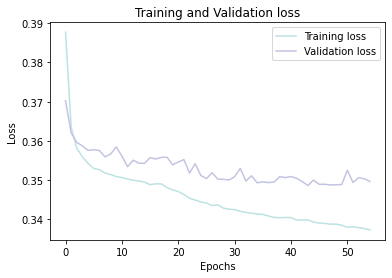

In [203]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

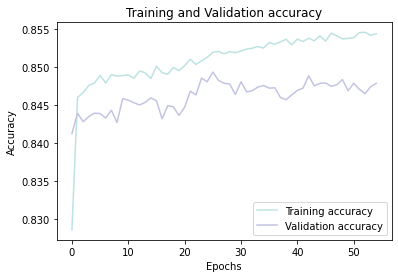

In [204]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [207]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

<AxesSubplot:>

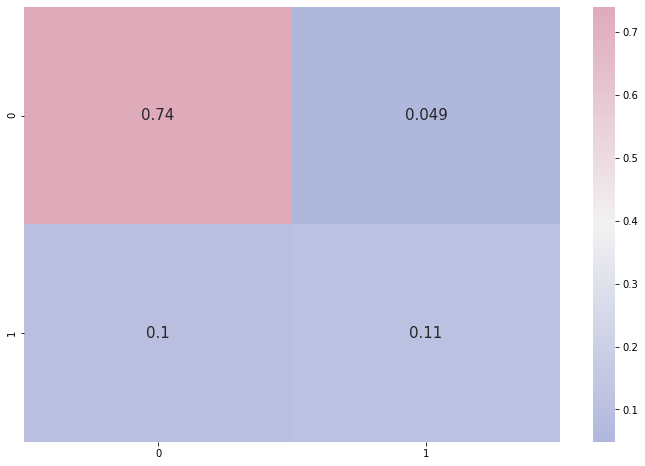

In [208]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     20110
           1       0.69      0.52      0.60      5398

    accuracy                           0.85     25508
   macro avg       0.79      0.73      0.75     25508
weighted avg       0.84      0.85      0.84     25508

